# Pandas: grouping

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Pipeline Controller

In [2]:
#df = load_original_data() 

#df = (df.pipe(clean_columns)
#.pipe(lowercase_and_clean_columns)
#.pipe(lowercase_col_text_data)
#)

#df

In [3]:
def load_original_data():
    df = pd.read_csv(r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\IH_RH_DA_FT_AUG_2022\Class_Materials\Pandas\data\vehicles.csv")
        
    return df

df = load_original_data()

In [4]:
def lowercase_col_text_data(entry):
    """
    Apply lowercase to every entry in every column if type(entry)==string
    """
    if type(entry)==str:
        return entry.lower()
    else:
        return entry
    
df = df.applymap(lowercase_col_text_data)

In [5]:
def lowercase_and_clean_columns(df):
    """
    Clean column names.
    Cast all as lowercase.
    Replace all spaces with "_".
    """
    df.loc[df[df["Make"].str.contains("utton")].index,"Make"] = "dutton"
    df.loc[df[df["Make"].str.contains("bmw")].index,"Make"] = "bmw"
    
    df_cols = [i.lower().replace(" ", "_") for i in df.columns]
    df.columns = df_cols
    return df

df = lowercase_and_clean_columns(df)

In [6]:
df

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams/mile,fuel_cost/year
0,am general,dj po vehicle 2wd,1984,2.5,4.0,automatic 3-spd,2-wheel drive,special purpose vehicle 2wd,regular,19.388824,18,17,17,522.764706,1950
1,am general,fj8c post office,1984,4.2,6.0,automatic 3-spd,2-wheel drive,special purpose vehicle 2wd,regular,25.354615,13,13,13,683.615385,2550
2,am general,post office dj5 2wd,1985,2.5,4.0,automatic 3-spd,rear-wheel drive,special purpose vehicle 2wd,regular,20.600625,16,17,16,555.437500,2100
3,am general,post office dj8 2wd,1985,4.2,6.0,automatic 3-spd,rear-wheel drive,special purpose vehicle 2wd,regular,25.354615,13,13,13,683.615385,2550
4,asc incorporated,gnx,1987,3.8,6.0,automatic 4-spd,rear-wheel drive,midsize cars,premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,auto(am6),rear-wheel drive,two seaters,premium,9.155833,34,39,36,246.000000,1100


How many Car models? 

In [7]:
### your code is here

# v1
no_of_models = len(df["model"].unique())

# v2
# no_of_models = len(df["model"].value_counts().index)

print(f"There are {no_of_models} car models.")

There are 3582 car models.


group by the data by the Make  using count function

In [8]:
Gram_per_Km = list(map(lambda x: x * (1/1.60934), df["co2_emission_grams/mile"]))
df["co2_emission_grams/km"] = Gram_per_Km

In [9]:
### your code us here
df_groupby_makebrand = df.groupby("make").count()
df_groupby_makebrand

,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams/mile,fuel_cost/year,co2_emission_grams/km
make,,,,,,,,,,,,,,,
acura,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
alfa romeo,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
am general,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
american motors corporation,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
asc incorporated,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volkswagen,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
volvo,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717
vpg,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


What brand has the most cars?

In [10]:
### your code us here
v1 = df_groupby_makebrand["model"].sort_values(ascending=False)
v1 = (v1.index[0], v1[0])

print(f"{v1[0]} has the most cars with {v1[1]} models.")

chevrolet has the most cars with 3643 models.


<b>show the average CO2_Emission_Grams/Km  by Brand

In [25]:
df_make_em_sorted

,make,avg_em
0,vector,651.92
1,bugatti,542.50
2,laforza automobile inc,502.01
3,dutton,476.42
4,rolls-royce,475.40
...,...,...
119,mini,194.94
120,daihatsu,192.74
121,fiat,189.31
122,smart,153.50


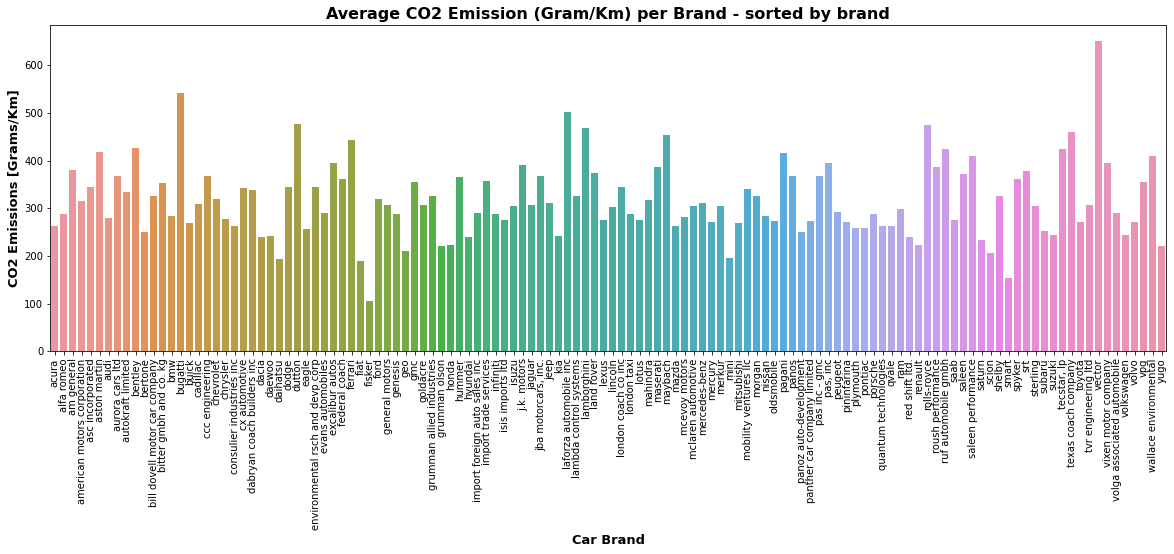

In [11]:
make = list(df.groupby("make")["co2_emission_grams/km"].mean().index)
avg_em = list(round(df.groupby("make")["co2_emission_grams/km"].mean(),2))
df_make_em = pd.DataFrame()
df_make_em["make"] = make
df_make_em["avg_em"] = avg_em

df_make_em_sorted = df_make_em.sort_values("avg_em", ascending=False).reset_index(drop=True)

fig = plt.figure(figsize=(20,6))
plt.title("Average CO2 Emission (Gram/Km) per Brand - sorted by brand", weight="bold", size=16)
sns.barplot(x = df_make_em["make"], y = df_make_em["avg_em"])
plt.xticks(rotation="vertical")
plt.ylabel("CO2 Emissions [Grams/Km]", weight="bold", size=13)
plt.xlabel("Car Brand", weight="bold", size=13)
plt.show()

<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

In [12]:
### your code us here

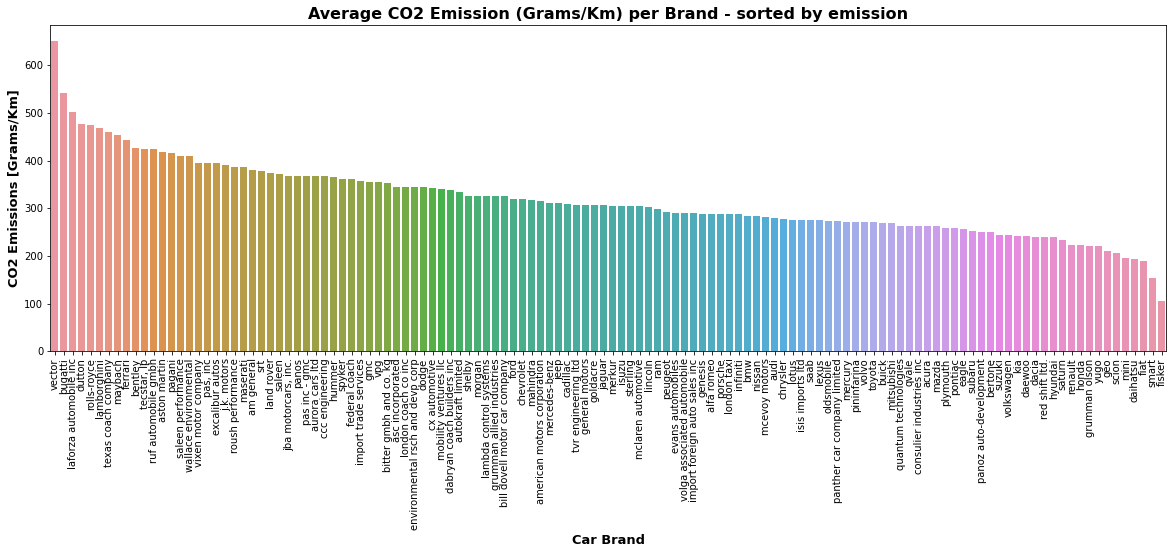

In [13]:
fig = plt.figure(figsize=(20,6))
plt.title("Average CO2 Emission (Grams/Km) per Brand - sorted by emission", weight="bold", size=16)
sns.barplot(x = df_make_em_sorted["make"], y = df_make_em_sorted["avg_em"])
plt.xticks(rotation="vertical")
plt.ylabel("CO2 Emissions [Grams/Km]", weight="bold", size=13)
plt.xlabel("Car Brand", weight="bold", size=13)
plt.show()

# (Optional) 

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [14]:
cut_year = pd.cut(x=df["year"], bins=list(range(1980,2021,10)), labels=["80s", "90s", "00s", "10s"], include_lowest=True)
df["year_bin"] = cut_year

df["city_mpg"] = list(map(lambda x: x * (1.60934/3.78541), df["city_mpg"]))
df["highway_mpg"] = list(map(lambda x: x * (1.60934/3.78541), df["highway_mpg"]))
df["combined_mpg"] = list(map(lambda x: x * (1.60934/3.78541), df["combined_mpg"]))

df.rename(columns={"city_mpg": "city_km/l", "highway_mpg": "highway_km/l", "combined_mpg": "combined_km/l"},
                   inplace=True)
df

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_km/l,highway_km/l,combined_km/l,co2_emission_grams/mile,fuel_cost/year,co2_emission_grams/km,year_bin
0,am general,dj po vehicle 2wd,1984,2.5,4.0,automatic 3-spd,2-wheel drive,special purpose vehicle 2wd,regular,19.388824,7.652571,7.227428,7.227428,522.764706,1950,324.831736,80s
1,am general,fj8c post office,1984,4.2,6.0,automatic 3-spd,2-wheel drive,special purpose vehicle 2wd,regular,25.354615,5.526857,5.526857,5.526857,683.615385,2550,424.779962,80s
2,am general,post office dj5 2wd,1985,2.5,4.0,automatic 3-spd,rear-wheel drive,special purpose vehicle 2wd,regular,20.600625,6.802286,7.227428,6.802286,555.437500,2100,345.133719,80s
3,am general,post office dj8 2wd,1985,4.2,6.0,automatic 3-spd,rear-wheel drive,special purpose vehicle 2wd,regular,25.354615,5.526857,5.526857,5.526857,683.615385,2550,424.779962,80s
4,asc incorporated,gnx,1987,3.8,6.0,automatic 4-spd,rear-wheel drive,midsize cars,premium,20.600625,5.952000,8.928000,6.802286,555.437500,2550,345.133719,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,14.454857,16.155428,15.305143,244.000000,1100,151.614948,10s
35948,smart,fortwo coupe,2014,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,14.454857,16.155428,15.305143,243.000000,1100,150.993575,10s
35949,smart,fortwo coupe,2015,1.0,3.0,auto(am5),rear-wheel drive,two seaters,premium,9.155833,14.454857,16.155428,15.305143,244.000000,1100,151.614948,10s
35950,smart,fortwo coupe,2016,0.9,3.0,auto(am6),rear-wheel drive,two seaters,premium,9.155833,14.454857,16.580571,15.305143,246.000000,1100,152.857693,10s


### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

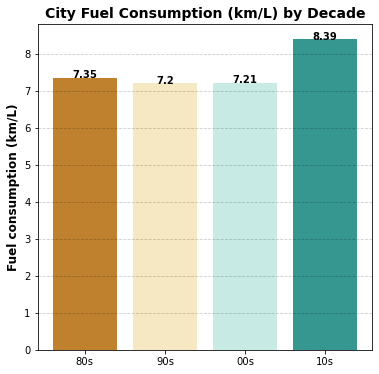

In [15]:
city_kml_timeframe = list(df.groupby("year_bin")["city_km/l"].mean().index)
bins_strings = ["80s", "90s", "00s", "10s"]
city_kml_usage = list(round(df.groupby("year_bin")["city_km/l"].mean(),2))

colors = sns.color_palette("BrBG", 4)

### PLOTTING
fig = plt.figure(figsize=(6,6))
plt.title("City Fuel Consumption (km/L) by Decade", weight="bold", size=14)
plt.grid(ls="--", alpha=0.2, color="k", axis="y")

xdata = range(len(city_kml_timeframe))
xlabels = bins_strings
ydata = city_kml_usage

plt.bar(xdata, ydata, color=colors)
plt.xticks(xdata, labels=xlabels)
plt.ylabel("Fuel consumption (km/L)", weight="bold", size=12)

for idx, fuel in enumerate(city_kml_usage):
    plt.annotate(str(fuel), (idx,fuel), ha="center", weight="bold")

plt.show()

**`Conclusion`**

Even though cars are more fuel-efficient in the 2010-2020, it's likely that the heavily increased city traffic forces more idle time, resulting in higher overall fuel usage to cover the same distance.

**Which brands are more environment friendly?**

In [16]:
df_make_em_sorted.iloc[-5:,:]

,make,avg_em
119,mini,194.94
120,daihatsu,192.74
121,fiat,189.31
122,smart,153.50
123,fisker,105.01


The 5 brands with the lowest emissions are: Mini, Daihatsu, Fiat, Smart, Fisker

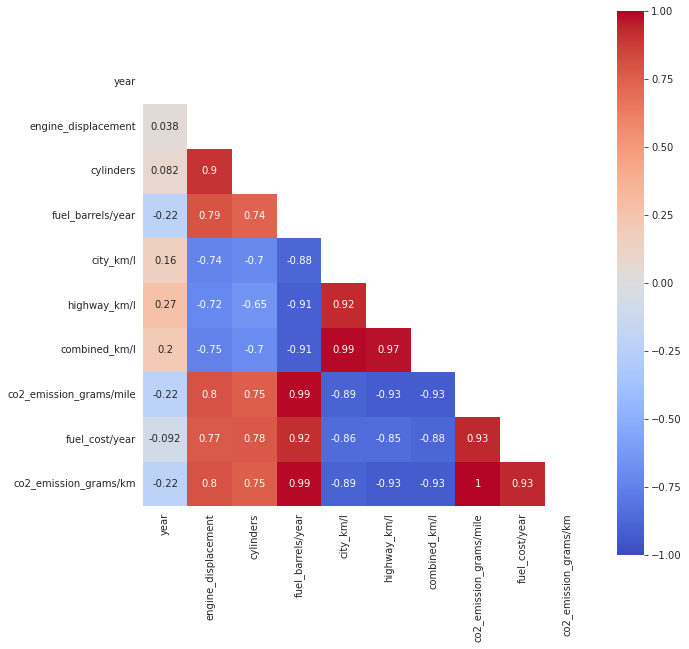

In [17]:
df_numerical = df.select_dtypes(exclude=['object'])
corr = df_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

**`Observations`**

- newer cars have lower emissions
- more powerful cars - measure by amount of cylinders - have higher emissions

In [18]:
### your code is here

**Does the drivetrain affect fuel consumption?**

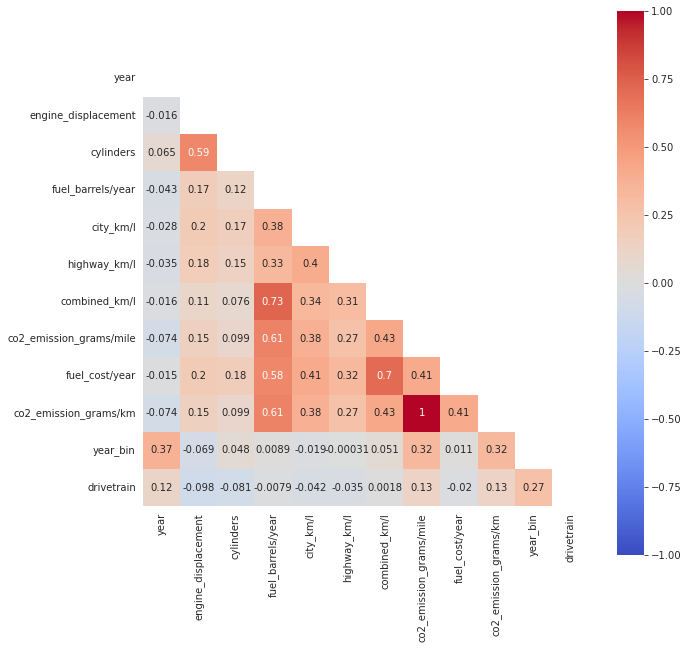

In [19]:
df_numerical_with_drivetrain = df_numerical
df_numerical_with_drivetrain["drivetrain"] = df["drivetrain"]
df_numerical_with_drivetrain_ = df_numerical_with_drivetrain.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

corr = df_numerical_with_drivetrain_
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
plt.show()

In [ ]:
# grouping by front / back / 4 wheel drives !?

In [20]:
df_drivetrain = df.groupby("drivetrain")[["highway_km/l", "city_km/l"]].mean()
df_drivetrain.sort_values("highway_km/l", ascending=False)

,highway_km/l,city_km/l
drivetrain,,
"2-wheel drive, front",14.029714,10.628571
front-wheel drive,12.166210,9.002214
all-wheel drive,10.882531,7.785598
4-wheel drive,9.668584,7.190861
rear-wheel drive,9.023946,6.556574
4-wheel or all-wheel drive,8.347130,6.392049
2-wheel drive,8.222444,6.642480
part-time 4-wheel drive,8.115385,6.215696


**Do cars with automatic transmission consume more fuel than cars with manual transmission?**

In [21]:
transmissions = ["automatic" if "auto" in trans else "manual" for trans in df["transmission"]]
df.insert(list(df.columns).index("transmission")+1, "transmissions", transmissions)


In [22]:
df.groupby("transmissions")[["city_km/l"]].mean()

,city_km/l
transmissions,
automatic,7.278292
manual,7.968348


**`Observation`**

Cars with automatic transmission use around 0.7 km/l less in the city than cars with manual transmission.

Use `groupby` and `agg` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [23]:
## your code is here

aggregate with average City_Km/Liter and the minimum of the Trans

In [24]:
### your code is here